In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [2]:
class Pebbling():
    def __init__(self, G, P):
        self.G = G
        self.P = P
        self.n =  G.number_of_nodes()
        self.pebbling_matrix = np.zeros((len(P), self.n))
        for i in range(len(P)):
            for v in P[i]:
                self.pebbling_matrix[i][v] = 1

    def is_legal_classic(self):
        if self.P[0]!={0} or self.n-1 not in self.P[-1]:
            return False

        for i in range(1,len(self.P)):
            for v in self.P[i]:
                if not set(self.G.predecessors(v)) <= self.P[i-1]:
                    return False
        return True

    def show_graph(self):
        nx.draw(self.G, with_labels=True)

    def show_pebbling(self):
        plt.matshow(self.pebbling_matrix)

True


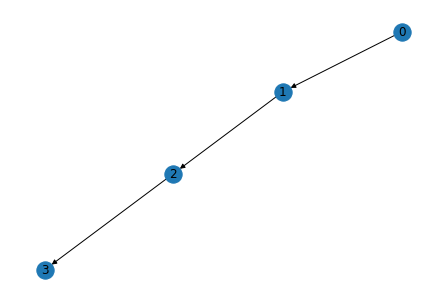

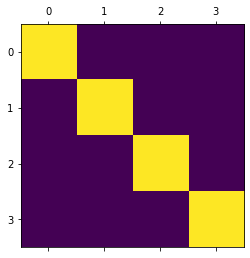

In [4]:
G = nx.DiGraph([(0,1), (1,2), (2,3)])
P = Pebbling(G, [{i} for i in range(0, 4)])
P.show_graph()
print(P.is_legal_classic())
P.show_pebbling()

In [16]:
def rec_val(L, i):
    if not isinstance(L, list):
        return L
    else:
        if len(L):
            return rec_val(L[i],i)
        else:
            return None

def get_next_start(intervals, start):
    last = rec_val(intervals, -1)
    if last is None:
        return start
    else:
        return last + 1
    
def interval(k, start):
    if k==0:
        return []
    if k==1:
        return[start]
    intervals = []
    for i in range(1, k+1):
        next_start = get_next_start(intervals, start)
        next_inter = interval(k-i, next_start)
        if len(next_inter):
            intervals = intervals + [next_inter]
        
        intervals = intervals + [rec_val(intervals, -1)+1]
    print(intervals[-1],'**')
    return intervals

def chunk_interval(I):
    chunk = []
    for i in I:
        if isinstance(i,list):
            chunk.append(i)
        
    return chunk

print('---')
for x in chunk_interval(interval(5, 1)):
    print(x)

---
3 **
7 **
11 **
15 **
19 **
23 **
27 **
31 **
[[[[1], 2, 3], 4, [5], 6, 7], 8, [[9], 10, 11], 12, [13], 14, 15]
[[[17], 18, 19], 20, [21], 22, 23]
[[25], 26, 27]
[29]


In [148]:
def Bennett(k, interval, P):
    if k == 0:
        return P
    if k == 1:
        return P
    for i in range(1,k+1):
        P = P + Bennett(k-i, interval[k-i][:-1], copy(P))
        P.append(P[-1]+["i_"+str(k-i)])
        P = P + Bennett_inv(k-i, interval[k-i][:-1], copy(P))
    return P

def Bennett_inv(k, interval, P):
    if k == 0:
        return []
    for i in range(1,k+1):
        P = P + Bennett_inv(k-i, interval[k-i][:-1], copy(P))
        P.append(P[-1]+["i_"+str(k-i)])
        P = P + Bennett(k-i, interval[k-i][:-1], copy(P))
    return P

In [149]:
range(0)

range(0, 0)

In [150]:
Bennett(2, interval(2, 1), [])

3


TypeError: 'int' object is not subscriptable